In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [0]:
print(tf.__version__)

1.15.0


In [0]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [0]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [0]:
x_train.max()

255

In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [0]:
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_test.shape

(10000, 32, 32, 3)

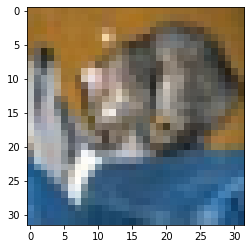

In [0]:
plt.imshow(x_test[0])

In [0]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

# Build CNN Model

In [0]:
model=Sequential()

In [0]:
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='Valid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
 model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [0]:
history=model.fit(x_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 217s 4ms/sample - loss: 1.3696 - sparse_categorical_accuracy: 0.5075 - val_loss: 1.1547 - val_sparse_categorical_accuracy: 0.5913
Epoch 2/10
50000/50000 [==============================] - 215s 4ms/sample - loss: 1.0546 - sparse_categorical_accuracy: 0.6254 - val_loss: 0.9722 - val_sparse_categorical_accuracy: 0.6558
Epoch 3/10
50000/50000 [==============================] - 213s 4ms/sample - loss: 0.9298 - sparse_categorical_accuracy: 0.6727 - val_loss: 0.9268 - val_sparse_categorical_accuracy: 0.6751
Epoch 4/10
50000/50000 [==============================] - 215s 4ms/sample - loss: 0.8414 - sparse_categorical_accuracy: 0.7011 - val_loss: 0.9253 - val_sparse_categorical_accuracy: 0.6799
Epoch 5/10
50000/50000 [==============================] - 216s 4ms/sample - loss: 0.7710 - sparse_categorical_accuracy: 0.7286 - val_loss: 0.9565 - val_sparse_categorical_accuracy: 0.6815
Epoch 6/10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


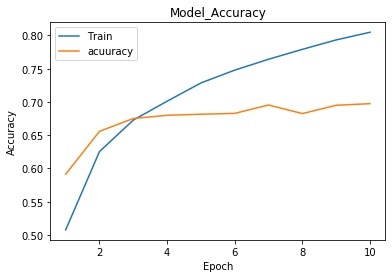

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


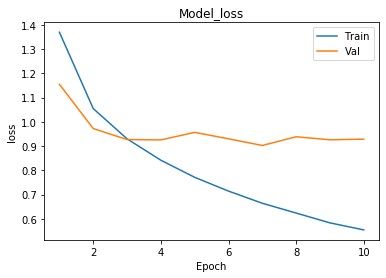

In [0]:
   #Plot training and validation accuracy values
  epoch_range=range(1,11)
  plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
  plt.title('Model_Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','acuuracy'],loc='upper_left')
  plt.show()


  # plot training and validationn loss values


  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model_loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper_left')
  plt.show()


In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


In [0]:
y_pred=model.predict_classes(x_test)


In [0]:
y_pred

array([3, 1, 8, ..., 5, 1, 7])

In [0]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)